In [63]:
import numpy as np
from itertools import combinations

In [64]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from utils import * 
from importlib import reload
from random import choice, shuffle

reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

In [65]:
numplayers = 4
durak_game = Game.DurakGame(numplayers, 'small')

In [66]:
for p in durak_game.players:
    print(p.player_mode)

MODE_DEFEND
MODE_WAIT
MODE_WAIT
MODE_ATTACK


In [67]:
print(durak_game.playing_field)

--- Playing Field ---
Drawing DurakDeck: --- Card Collection ---
Cards: H6,H5,H7,S6,C2,S7,S2,C7,C6,D0,C0,D3.
Size: 12
-----------------------

0:--- Card Collection ---
Cards: D5,D7,C3,H2,S1,S3.
Size: 6
-----------------------

1:--- Card Collection ---
Cards: D6,D8,H1,H3,H8,S4.
Size: 6
-----------------------

2:--- Card Collection ---
Cards: D4,C1,C5,S0,S5,S8.
Size: 6
-----------------------

3:--- Card Collection ---
Cards: D1,D2,C4,C8,H0,H4.
Size: 6
-----------------------

Trump suit is Diamonds
---------------------



In [68]:
players_on_attack = [p.player_id for p in durak_game.playing_field.attack_players()]
p_att_idx = players_on_attack[0]
print(durak_game.players[p_att_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D1,D2,C4,C8,H0,H4.
Size: 6
-----------------------



In [69]:
p_def_idx = durak_game.playing_field.defend_player().player_id
print(durak_game.players[p_def_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D5,D7,C3,H2,S1,S3.
Size: 6
-----------------------



In [70]:
durak_game.playing_field.first_attack

True

In [71]:
attack_moves = durak_game.playing_field.get_legal_moves(p_att_idx)
attack_moves

[((1, 4),),
 ((1, 8),),
 ((2, 0),),
 ((2, 4),),
 ((3, 1),),
 ((3, 2),),
 ((1, 4), (2, 4))]

In [72]:
random_move = choice(durak_game.playing_field.get_legal_moves(p_att_idx))
print(random_move)

((3, 1),)


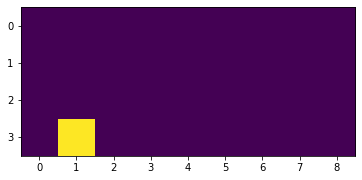

In [73]:
durak_game.playing_field.execute_move(random_move, p_att_idx)
plt.imshow(durak_game.playing_field.attacks)

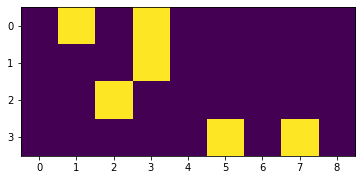

In [74]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [75]:
defend_actions = durak_game.playing_field.get_legal_moves(p_def_idx)
print(defend_actions)

[((1, 28),), ((3, 28),), ((32, 28),), ((34, 28),)]


In [76]:
random_defend = choice(defend_actions)
print(random_defend)

((1, 28),)


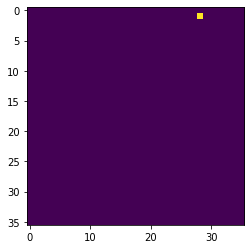

In [77]:
durak_game.get_next_state(random_defend, p_def_idx)
plt.imshow(durak_game.playing_field.field)

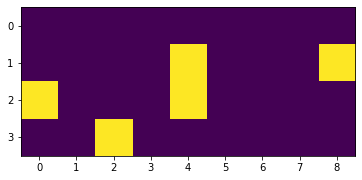

In [78]:
plt.imshow(durak_game.players[p_att_idx].hand)

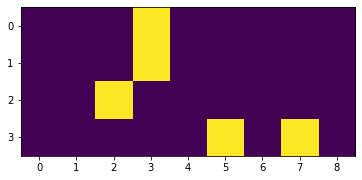

In [79]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [80]:
for p in durak_game.players:
    print(p.player_mode)

MODE_ATTACK
MODE_DEFEND
MODE_ATTACK
MODE_ATTACK
